## Random forest classcifation

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Unpickle file
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict;

data_train = unpickle('./cifar-100-python/train')
train = data_train.get('data')
train_coarse_labels = data_train.get('coarse_labels')

#Grayscale preprocessing
train_image = train.reshape(-1,3,32,32)
train_image_gray = np.zeros(train_image.shape)
for i in range(0, train_image.shape[0]):
    r = train_image[i][0]
    g = train_image[i][1]
    b = train_image[i][2]
    grey = r*0.3+g*0.59+b*0.11
    image_grey = [grey, grey, grey]
    train_image_gray[i] = image_grey
train = train_image_gray.reshape(-1, 3072)

train = pd.DataFrame(train)
train_coarse_labels = pd.DataFrame(train_coarse_labels)

In [2]:
#Standardization
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(trSain)

#Principal component analysis
pca = PCA(n_components = 0.8)
train = pca.fit_transform(train)

In [3]:
#Split data set
x_train, x_test, y_train, y_test = train_test_split(train, train_coarse_labels[0], test_size = 0.2)
x_train.shape

(40000, 22)

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Use RandomizedSearchCV to find parameters for the random forest algorithm (including 10 cross-validation)
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 20, num = 15)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

rf_coarse = RandomForestClassifier()
rf_random_coarse = RandomizedSearchCV(
    estimator = rf_coarse, 
    param_distributions = random_grid,
    n_iter = 20,
    scoring = 'accuracy', 
    cv = 10,
    verbose = 2,
    n_jobs = -1
)
rf_random_coarse.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 46.2min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [600, 700, 800, 900,
                                                         1000]},
                   scoring='accuracy', verbose=2)

In [5]:
#The best parameters of random forest
rf_random_coarse.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [7]:
#Get the best classifier
rfc_coarse = rf_random_coarse.best_estimator_
rfc_coarse.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_split=10, n_estimators=600)

In [36]:
from sklearn.metrics import classification_report

#Generate classification_report for random forest
print("Random forest classification report for super class in Cifar-100")
print(classification_report(y_test, rfc_coarse.predict(x_test)))

Random forest classification report for super class in Cifar-100
              precision    recall  f1-score   support

           0       0.17      0.12      0.14       502
           1       0.32      0.27      0.29       501
           2       0.21      0.33      0.26       474
           3       0.44      0.41      0.42       481
           4       0.44      0.24      0.31       504
           5       0.38      0.22      0.28       497
           6       0.37      0.30      0.33       524
           7       0.25      0.34      0.29       468
           8       0.19      0.15      0.17       523
           9       0.28      0.37      0.31       500
          10       0.40      0.54      0.46       510
          11       0.22      0.21      0.21       505
          12       0.20      0.27      0.23       475
          13       0.21      0.20      0.21       472
          14       0.27      0.34      0.30       504
          15       0.17      0.15      0.16       503
          16    

Random forest confusion matrix for super class in Cifar-100


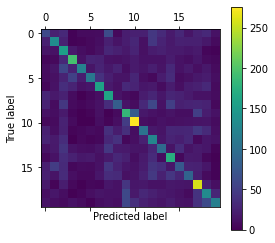

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib

#Generate confusion matrix for random forest
def confusion_matrix_plot(y_text, y_predict):
    matrix = confusion_matrix(y_text, y_predict)
    plt.matshow(matrix)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

print("Random forest confusion matrix for super class in Cifar-100")
confusion_matrix_plot(y_test, rfc_coarse.predict(x_test)).show()

#### The following is the prediction of the algorithm for test. 
#### The following cell can be run independently.
#### The parameters of the classifier are the results of the report above.
#### The purpose of the test set being mixed into the train is to make the test set perform the same preprocessing as the train set, where the test set does not participate in the model training process.

Random forest classification report for super class in Cifar-100
              precision    recall  f1-score   support

           0       0.18      0.15      0.17       500
           1       0.30      0.28      0.29       500
           2       0.22      0.32      0.26       500
           3       0.40      0.36      0.38       500
           4       0.42      0.23      0.30       500
           5       0.34      0.21      0.26       500
           6       0.30      0.25      0.27       500
           7       0.27      0.33      0.30       500
           8       0.18      0.17      0.17       500
           9       0.29      0.38      0.33       500
          10       0.37      0.49      0.42       500
          11       0.19      0.16      0.17       500
          12       0.20      0.24      0.22       500
          13       0.20      0.17      0.18       500
          14       0.22      0.28      0.25       500
          15       0.16      0.13      0.14       500
          16    

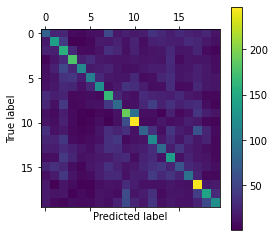

Total running time 257.15671706199646


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

start = time.time()

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict;

def random_forest_classcifation(data_train_features, data_train_labels, data_test_features):
    train = data_train_features
    train_coarse_labels = data_train_labels
    test = data_test_features
    #test_coarse_labels = data_test.get('coarse_labels')

    total = np.vstack((train, test))
    total_image = total.reshape(-1,3,32,32)
    total_image_gray = np.zeros(total_image.shape)
    for i in range(0, total_image.shape[0]):
        r = total_image[i][0]
        g = total_image[i][1]
        b = total_image[i][2]
        grey = r*0.3+g*0.59+b*0.11
        image_grey = [grey, grey, grey]
        total_image_gray[i] = image_grey
    total = total_image_gray.reshape(-1, 3072)

    scaler_total = StandardScaler()
    scaler_total.fit(total)
    total = scaler_total.transform(total)

    pca_total = PCA(n_components = 0.8)
    total = pca_total.fit_transform(total)

    train = total[0:50000,:]
    test = total[50000:60000,:]

    random_forest = RandomForestClassifier(
        n_estimators = 600,
        min_samples_split = 10,
        min_samples_leaf = 1,
        max_features = 'sqrt',
        max_depth = 20,
        bootstrap = False
    )
    random_forest.fit(train, train_coarse_labels)
    return random_forest.predict(test)

data_train = unpickle('./cifar-100-python/train')
train = data_train.get('data')
train_coarse_labels = data_train.get('coarse_labels')
data_test = unpickle('./cifar-100-python/test')
test = data_test.get('data')

test_predict = random_forest_classcifation(train, train_coarse_labels, test)
test_coarse_labels = data_test.get('coarse_labels')

print("Random forest classification report for super class in Cifar-100")
print(classification_report(test_coarse_labels, test_predict))

def confusion_matrix_plot(y_text, y_predict):
    matrix = confusion_matrix(y_text, y_predict)
    plt.matshow(matrix)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

print("Random forest confusion matrix for super class in Cifar-100")
confusion_matrix_plot(test_coarse_labels, test_predict).show()   

print('Total running time', time.time() - start)

## K-nn classcifation

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import tarfile

from tqdm import tqdm
    
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle("./cifar-100-python/train")
test = unpickle("./cifar-100-python/test")
meta = unpickle("./cifar-100-python/meta")
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [2]:
#read data
#train set
train_data = train[b'data']
train_fine_labels = train[b'fine_labels']
train_coarse_labels = train[b'coarse_labels']

#test set
test_data = test[b'data']
test_fine_labels = test[b'fine_labels']
test_coarse_labels = test[b'coarse_labels']

In [3]:
#0-1 normalization 
train_data_01 = train_data/255
test_data_01 = test_data/255

In [6]:
#10k-fold &# knn within coarse labels
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = train_data_01
y = np.array(train_coarse_labels)

kf = KFold(n_splits=10)
kf.get_n_splits(X)


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for q in tqdm(range(6,14)):
        t3 = time.time()
        neigh_1 = KNeighborsClassifier(n_neighbors=q,n_jobs=-1)
        neigh_1.fit(X_train,y_train)
        predit_02=neigh_1.predict(test_data_01)
        coarse_label_score = (predit_02 == test_coarse_labels).mean()
        t4 = time.time()
        print("q:",q,"\n""Accuracy:{:.2%}".format(coarse_label_score),"\n""Cost Time: ", t4-t3)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

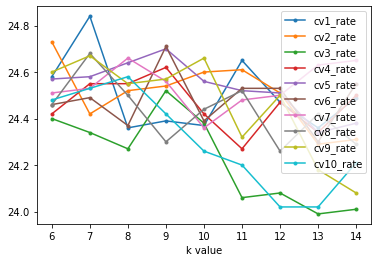

In [7]:
cv1_rate = [24.58,24.84,24.36,24.39,24.37,24.65,24.47,24.36,24.49]
cv2_rate = [24.73,24.42,24.52,24.54,24.60,24.61,24.51,24.29,24.31]
cv3_rate = [24.40,24.34,24.27,24.52,24.38,24.06,24.08,23.99,24.01]
cv4_rate = [24.42,24.55,24.55,24.62,24.42,24.27,24.47,24.34,24.50]
cv5_rate = [24.57,24.58,24.64,24.70,24.56,24.52,24.51,24.34,24.38]
cv6_rate = [24.46,24.49,24.37,24.71,24.39,24.53,24.53,24.30,24.55]
cv7_rate = [24.51,24.53,24.66,24.56,24.36,24.48,24.50,24.63,24.65]
cv8_rate = [24.46,24.68,24.50,24.30,24.44,24.52,24.26,24.42,24.29]
cv9_rate = [24.60,24.67,24.55,24.57,24.66,24.32,24.50,24.18,24.08]
cv10_rate = [24.48,24.53,24.58,24.42,24.26,24.20,24.02,24.02,24.21]
k_value  = [6,7,8,9,10,11,12,13,14]
plt.plot(k_value, cv1_rate, '.-', label='cv1_rate')
plt.plot(k_value, cv2_rate, '.-', label='cv2_rate')
plt.plot(k_value, cv3_rate, '.-', label='cv3_rate')
plt.plot(k_value, cv4_rate, '.-', label='cv4_rate')
plt.plot(k_value, cv5_rate, '.-', label='cv5_rate')
plt.plot(k_value, cv6_rate, '.-', label='cv6_rate')
plt.plot(k_value, cv7_rate, '.-', label='cv7_rate')
plt.plot(k_value, cv8_rate, '.-', label='cv8_rate')
plt.plot(k_value, cv9_rate, '.-', label='cv9_rate')
plt.plot(k_value, cv10_rate, '.-', label='cv10_rate')

plt.xticks(k_value) 
plt.xlabel('k value') 
plt.legend() 
plt.show() 

In [8]:
#knn
t1 = time.time()
neigh_1 = KNeighborsClassifier(n_neighbors=7 ,n_jobs=-1)
neigh_1.fit(train_data_01,train_coarse_labels)
predit_02=neigh_1.predict(test_data_01)
coarse_label_score = (predit_02 == test_coarse_labels).mean()
t2 = time.time()
print("Accuracy:{:.2%}".format(coarse_label_score),"\n""Cost Time: ", t2-t1)

Accuracy:25.04% 
Cost Time:  484.14575362205505


In [11]:
# precision & recall
from sklearn.metrics import classification_report
print(classification_report(test_coarse_labels, predit_02))

              precision    recall  f1-score   support

           0       0.17      0.28      0.21       500
           1       0.18      0.39      0.25       500
           2       0.64      0.24      0.35       500
           3       0.29      0.46      0.35       500
           4       0.54      0.32      0.40       500
           5       0.32      0.21      0.25       500
           6       0.30      0.23      0.26       500
           7       0.35      0.29      0.32       500
           8       0.20      0.09      0.12       500
           9       0.34      0.22      0.26       500
          10       0.22      0.69      0.33       500
          11       0.20      0.11      0.14       500
          12       0.20      0.20      0.20       500
          13       0.12      0.25      0.17       500
          14       0.65      0.09      0.15       500
          15       0.11      0.12      0.11       500
          16       0.18      0.14      0.15       500
          17       0.48    

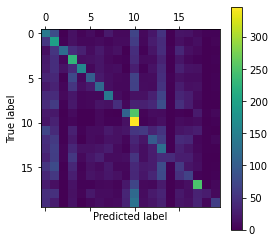

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot(test_coarse_labels, y_predict):
    matrix = confusion_matrix(test_coarse_labels, y_predict)
    plt.matshow(matrix)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

confusion_matrix_plot(test_coarse_labels, predit_02).show()